# Clasificación de insectos

El presente notebook participa en el IT JUNIOR Hackathon de JOBarcelona'22, en la modalidad de Data Science. El ejercicio consiste  en la elaboración de un modelo predictivo de clasificación de tipos de insecto. Los datos se proporcionan en varios ficheros .csv; uno de ellos recoge instancias con features y labels, en el cual se realizará el aprendizaje del modelo, y otro solo features, sobre el cual deberán realizarse las predicciones.


Sin más preambulos, comenzamos con la exposición del trabajo.

## Exportación de librerías.

En primer lugar exportamos las librerías de Python apropiadas para ciencia de datos: $\texttt{numpy}$, para tratamiento numérico y algebraico; $\texttt{pandas}$, para el tratamiento de tablas y series de datos; $\texttt{matplotlib.pyplot}$, para representaciones gráficas; y $\texttt{seaborn}$, para representaciones gráficas de datos avanzadas.

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploración de los datos

Todo buen proyecto de ciencia de datos debe realizar un análisis exploratorio de los datos (EDA), que sea tanto numérico como visual.

A continuación importamos y mostramos los datos del fichero $\textit{train.csv}$, que contiene datos con features y sus labels correspondientes

In [280]:
df_train = pd.read_csv('train.csv')

df_train.head()

Unnamed: 0  Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
0           0    22       26    119.910995   242.838324   -316.819222   
1           1    10       16    -90.790536  -269.470767   -182.581844   
2           2    21       42    -20.028003  -147.070212     50.280872   
3           3    21       17    -21.258567     0.467070    -86.164153   
4           4    18       16    -58.154501   -13.051195   -156.501167   

   Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  Insect  
0         250.195048        -53.547777        -112.049983       2  
1          95.394941         37.291944          48.525180       0  
2         -90.750386        -50.476556          85.399009       1  
3         -21.813529       -209.256006          16.291882       0  
4          48.392938       -110.008860         -10.285138       2

Como vemos existe una columna sin nombre en el fichero que simplemente representa el índice de las filas. Dado que $\texttt{pandas}$ construye un indice por defecto, vamos a cargar de nuevo los datos con la opción $index\_col=0$ para evitar el duplicado del índice

In [281]:
df_train = pd.read_csv('train.csv',index_col=0)

df_train.head()

Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  Sensor_alpha_plus  \
0    22       26    119.910995   242.838324   -316.819222         250.195048   
1    10       16    -90.790536  -269.470767   -182.581844          95.394941   
2    21       42    -20.028003  -147.070212     50.280872         -90.750386   
3    21       17    -21.258567     0.467070    -86.164153         -21.813529   
4    18       16    -58.154501   -13.051195   -156.501167          48.392938   

   Sensor_beta_plus  Sensor_gamma_plus  Insect  
0        -53.547777        -112.049983       2  
1         37.291944          48.525180       0  
2        -50.476556          85.399009       1  
3       -209.256006          16.291882       0  
4       -110.008860         -10.285138       2

Ejecutamos varios métodos que nos proporcionan información sobre el dataset

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7001 entries, 0 to 7000
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               7001 non-null   int64  
 1   Minutes            7001 non-null   int64  
 2   Sensor_alpha       7001 non-null   float64
 3   Sensor_beta        7001 non-null   float64
 4   Sensor_gamma       7001 non-null   float64
 5   Sensor_alpha_plus  7001 non-null   float64
 6   Sensor_beta_plus   7001 non-null   float64
 7   Sensor_gamma_plus  7001 non-null   float64
 8   Insect             7001 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 547.0 KB


In [5]:
df_train.describe()

Hour      Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
count  7001.000000  7001.000000   7001.000000  7001.000000   7001.000000   
mean     19.598914    29.405942      0.477171   -29.974117     -5.624690   
std       3.507008    17.375830     99.294856   133.095125    115.871391   
min       1.000000     0.000000   -404.898823  -656.272666   -448.478039   
25%      19.000000    14.000000    -68.573905  -116.060383    -83.508747   
50%      21.000000    29.000000     -0.287447   -36.171567     -1.217606   
75%      21.000000    44.000000     66.480795    56.637778     76.870277   
max      23.000000    59.000000    351.256221   518.395878    378.349287   

       Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus       Insect  
count        7001.000000       7001.000000        7001.000000  7001.000000  
mean            7.188060         -0.757901          -0.554533     0.595772  
std           122.327980        100.039477         100.535951     0.661604  
min          -437.205393       -387.567443        -374.961689     0.000000  
25%           -79.496687        -68.061596         -69.652647     0.000000  
50%            -1.133567         -0.444124           0.027128     0.000000  
75%            93.285286         66.181909          67.838524     1.000000  
max           462.556319        345.279240         363.682391     2.000000

El dataset cuenta con 7001 instancias con 8 features numéricas y no contiene ningún valor nulo, por lo que no será necesario hacer una limpieza de estos valores. Dos de las features recogen la hora de la medición y seis de ellas la posición respecto a unos sensores. Respecto a los sensores, el enunciado del ejercicio dice que es la ''posición'' y no la ''distancia''. Esto, unido a que los datos pueden tomar valores negativos, hace que podamos interpretar los sensores como una suerte de ejes coordenados, o quizá como una serie de divisiones de la zona de estudio, cada división distinguiendo entre la zona ''positiva'' y la ''negativa''.

Mostramos las diferentes clases de insecto, representadas por números enteros:

In [6]:
print('Clases de insecto: ',df_train['Insect'].unique())
print('Total de clases: ',df_train['Insect'].nunique())

Clases de insecto:  [2 0 1]
Total de clases:  3


Vamos a representar la cantidad de instancias que pertenecen a cada clase

<AxesSubplot:xlabel='Insect', ylabel='count'>

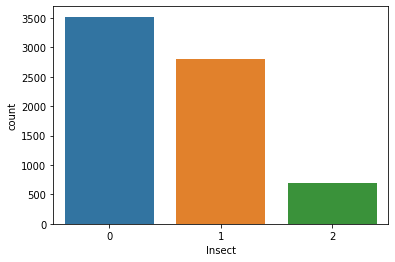

In [7]:
sns.countplot(x=df_train['Insect'])

Como vemos, la clase 2 tiene considerablemente menos instancias que el resto. Esto puede tener implicaciones graves según el modelo predictivo que utilicemos. Los datasets desbalanceados pueden entorpecer el correcto aprendizaje de los algoritmos de clasificación, haciendo que alguna de sus métricas sea muy pobre (por ejemplo, la precisión o el $\textit{recall}$, aunque tenga una $\textit{accuracy}$ global muy buena). Es por ello que una buena métrica para evaluar el poder predictivo de un algoritmo es el $\textit{f1-score}$, que combina las métricas mencionadas con la siguiente expresión.

$$\textit{f1-score} = 2\cdot\frac{precision\cdot recall}{precision + recall}$$

Esta es, como es de esperar, la métrica por lo que se evaluará el ejercicio. 

Las estrategias para tratar el problema de las clases desbalanceadas se discutirán más adelante.

Vamos a representar la distribución de los sensores y posteriormente las de la hora de la medición

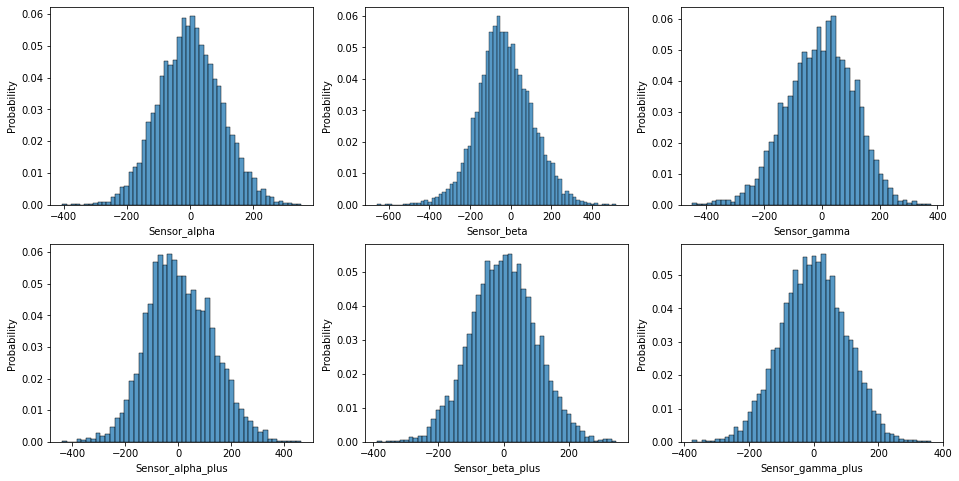

In [8]:
plt.figure(figsize=(16,8));

for i in range(1,7):
    plt.subplot(2,3,i)
    sns.histplot(df_train,x=df_train.columns[i+1],stat='probability')

Como vemos los seis sensores tienen distribuciones aproximádamente gaussianas, lo que también puede facilitar el aprendizaje de ciertos algoritmos.

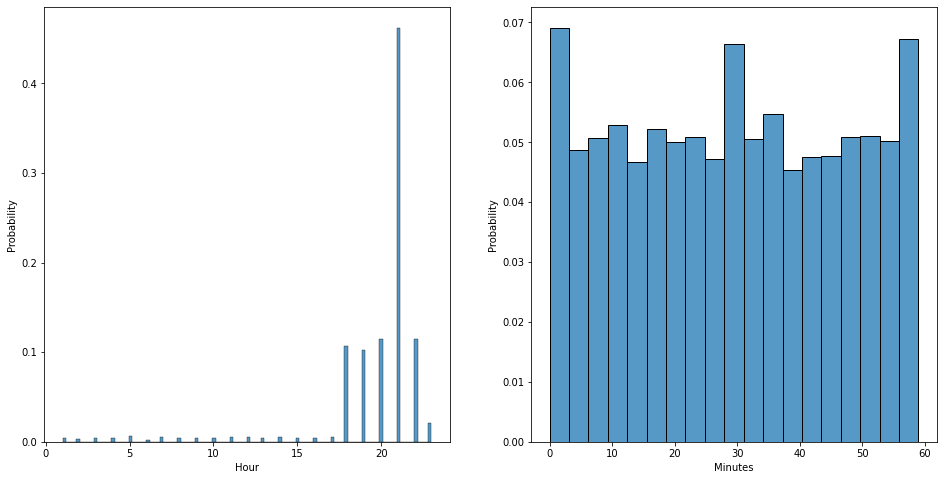

In [9]:
plt.figure(figsize=(16,8));

for i in range(1,3):
    plt.subplot(1,2,i)
    sns.histplot(df_train,x=df_train.columns[i-1],stat='probability')

Por otro lado, la mayor parte de las mediciones se han tomado por la noche, lo cual puede indicar que los insectos están más activos en esa franja horaria o que el experimento se diseñó para esas horas.

Vamos a realizar una representación de sumo interés: las distribuciones dobles de los sensores (un sensor representado frente a otro) y desglosadas por el tipo de insecto según el color del punto.

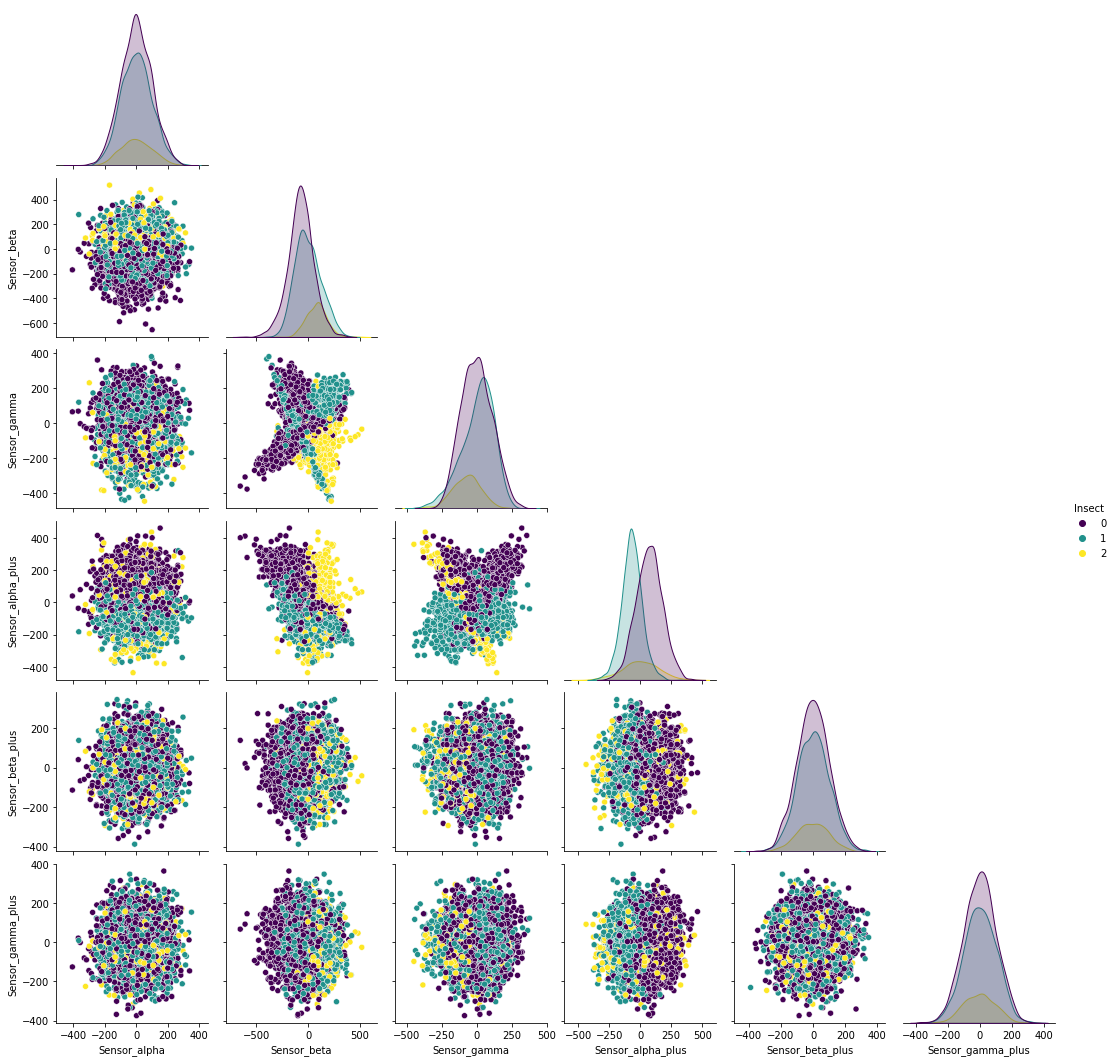

In [10]:
sns.pairplot(data = df_train,vars =['Sensor_alpha', 'Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus', 'Sensor_beta_plus', 'Sensor_gamma_plus'],hue='Insect',palette='viridis',corner=True)

Esta gráfica nos permite apreciar si existe alguna relación apreciable entre los sensores. Hay tres distribuciones interesantes:  Sensor gamma - Sensor beta, Sensor alpha plus - Sensor beta y Sensor alpha plus - Sensor gamma. Vamos a representarlas en solitario. 

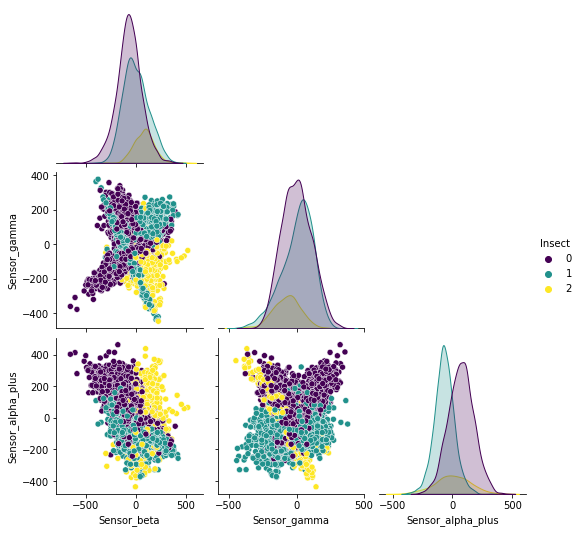

In [11]:
sns.pairplot(data = df_train,vars =['Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus'],hue='Insect',palette='viridis',corner=True);

En ellas se observan regiones complejas aunque claramente distinguibles en las que se sitúan los diferentes insectos. Esto tendrá implicaciones a la hora de hacer ingeniería de features.

Vamos a considerar momentáneamente las features que participan en esas distribuciones, y vamos a realizar la misma gráfica para cada insecto por separado:

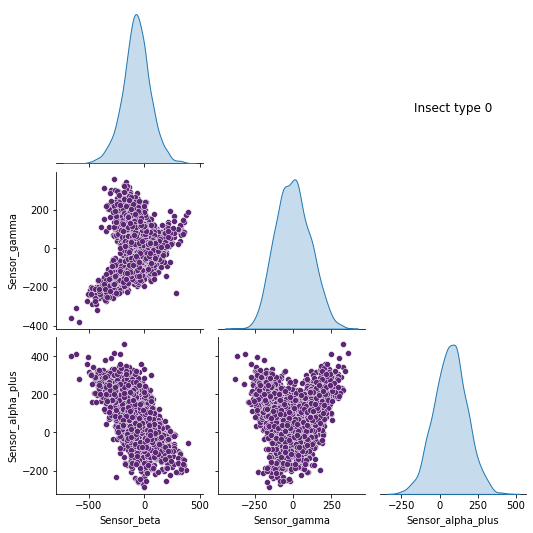

In [12]:
sns.pairplot(data = df_train[df_train['Insect']==0],vars =['Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus'],corner=True,plot_kws={'color':'#5c2675'},diag_kind='kde')
                    
plt.title('Insect type 0',y=2.4);

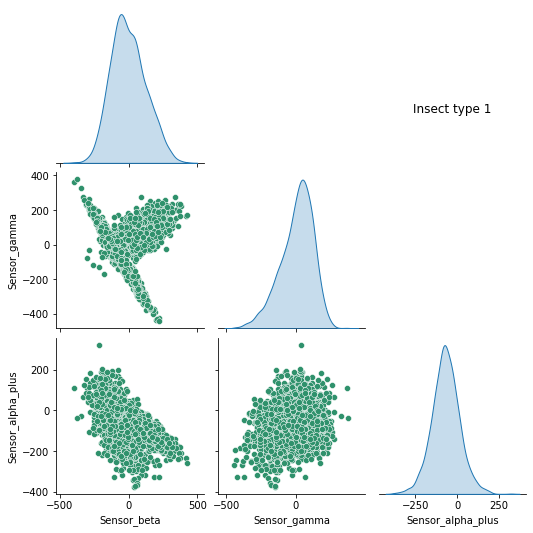

In [13]:
sns.pairplot(data = df_train[df_train['Insect']==1],vars =['Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus'],corner=True,plot_kws={'color':'#2f916c'},diag_kind='kde')
                    
plt.title('Insect type 1',y=2.4);

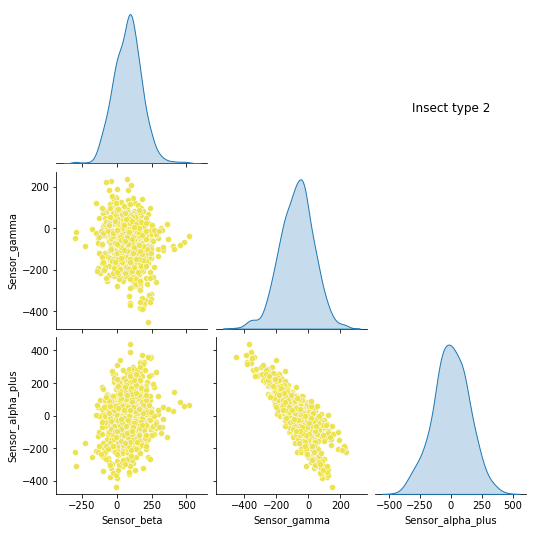

In [14]:
sns.pairplot(data = df_train[df_train['Insect']==2],vars =['Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus'],corner=True,plot_kws={'color':'#ede250'},diag_kind='kde')
                    
plt.title('Insect type 2',y=2.4);

Como podemos observar, cada tipo de insecto presenta unas distribuciones complejas para las features consideradas. En algunos casos se observa una clara correlación lineal entre las features; incluso se observan múltiples correlaciones. Estas sutilezas en los datos permitirán al algoritmo realizar la tarea de clasificación.

Antes de comenzar con la modelización, vamos a hacer un breve con el dataset sobre el que deben hacerse predicciones, $\textit{test_x.csv}$.

In [226]:
df_test = pd.read_csv('test_x.csv',index_col=0)
df_test

Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
7000    21       31    -72.083585   -11.434977    -52.961743   
7001    21        3   -193.619980    40.137081     85.419244   
7002    22       31     42.578382   -51.613402    125.055611   
7003    21       25    -64.150951   287.306752    -70.965473   
7004    18       11    193.750787   -61.989533   -110.347066   
...    ...      ...           ...          ...           ...   
9995     3       26   -101.913083    87.337077     77.193476   
9996    21        6     52.424913   -37.107249    120.373905   
9997    21        0   -103.295133    34.736979   -195.018118   
9998    20       13    170.027159   -73.100306   -117.330651   
9999    19       17   -173.839238    66.386097   -141.968498   

      Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  
7000         -72.696385        145.299227        -143.856243  
7001         -26.266801       -125.391237          80.904973  
7002         182.136746         -9.726951        -114.913402  
7003          13.789738         38.187260         137.761691  
7004         -16.864786        148.541916         232.424616  
...                 ...               ...                ...  
9995         -79.694034         13.273965         143.004786  
9996         208.090551       -135.567057         -53.867634  
9997        -164.294768        -26.993064           6.063715  
9998          11.353824         -3.366007        -140.113661  
9999         197.558808        -44.847981         142.537872  

[3000 rows x 8 columns]

In [237]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 7000 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               3000 non-null   int64  
 1   Minutes            3000 non-null   int64  
 2   Sensor_alpha       3000 non-null   float64
 3   Sensor_beta        3000 non-null   float64
 4   Sensor_gamma       3000 non-null   float64
 5   Sensor_alpha_plus  3000 non-null   float64
 6   Sensor_beta_plus   3000 non-null   float64
 7   Sensor_gamma_plus  3000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 210.9 KB


In [238]:
df_test.describe()

Hour      Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
count  3000.000000  3000.000000   3000.000000  3000.000000   3000.000000   
mean     19.592333    28.794667     -1.919118   -24.595316     -6.080556   
std       3.507170    17.184749     99.171174   132.681144    118.088276   
min       1.000000     0.000000   -342.226389  -612.756986   -503.601661   
25%      19.000000    14.000000    -68.798809  -115.504386    -82.921849   
50%      21.000000    29.000000     -2.059707   -31.304727     -0.759961   
75%      21.000000    44.000000     65.062197    64.770736     81.005055   
max      23.000000    59.000000    361.764160   430.245370    359.069750   

       Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  
count        3000.000000       3000.000000        3000.000000  
mean            7.054850         -0.236489           1.040049  
std           122.248203        100.083264         100.899952  
min          -400.721699       -340.002237        -340.995657  
25%           -77.789061        -68.913955         -67.204411  
50%            -0.861763         -2.206641           3.432020  
75%            90.398785         67.976897          69.033914  
max           465.946166        322.235930         370.807624

Hemos observado que hay una fila que también se encuentra en $\textit{train.csv}$, la que tiene el índice $7000$. Es posible que se trate de un error. En consecuencia, en la predicción final la retiraremos del set de entrenamiento, ya que sería injusto predecir una instancia con la que el algoritmo ha sido entrenado, constituyendo un claro caso de data leakage.

Hagamos una serie de representaciones gráficas.

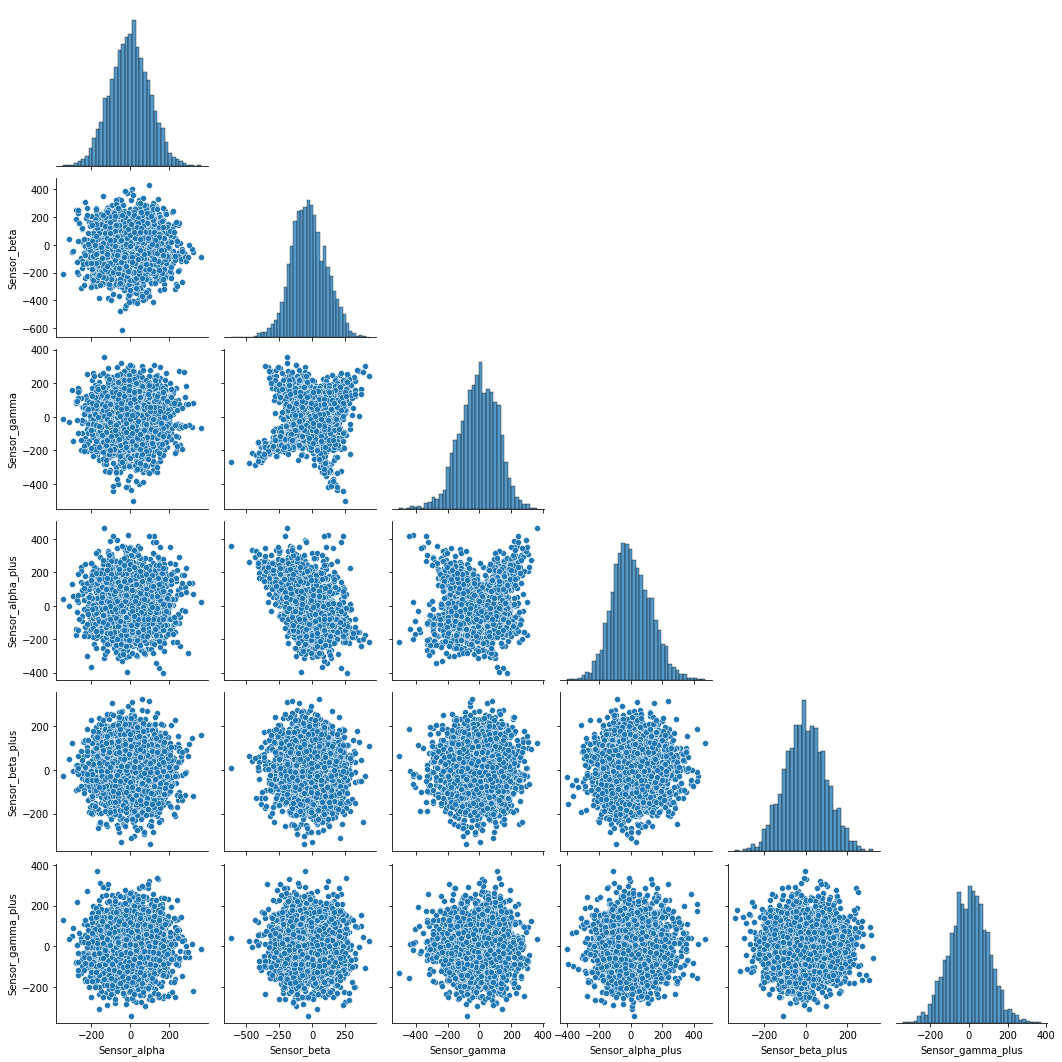

In [228]:
sns.pairplot(data = df_test,vars =['Sensor_alpha', 'Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus', 'Sensor_beta_plus', 'Sensor_gamma_plus'],corner=True)

Visualmente observamos que las distribuciones son bastante parecidas a las de $\textit{train.csv}$, lo que indica que es probable que el modelo pueda generalizar con facilidad.

Comparemos las distribuciones de mayor interés.

<Figure size 864x432 with 0 Axes>

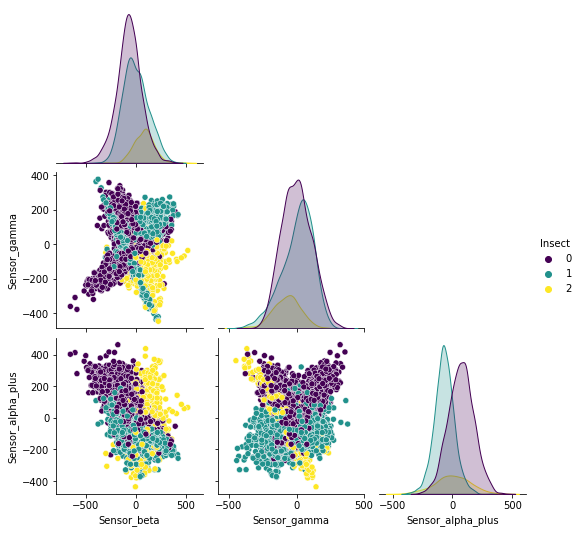

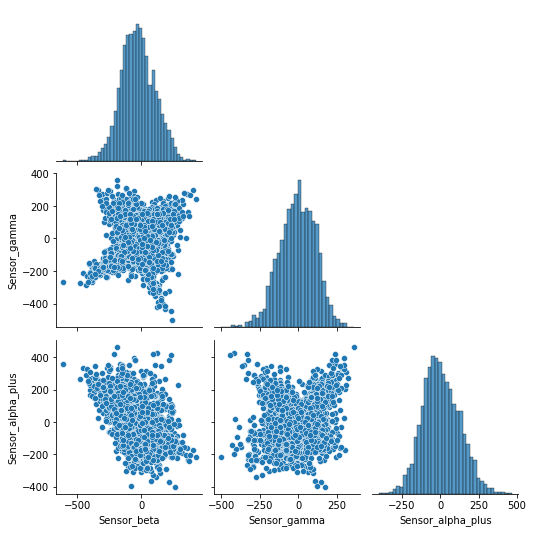

In [236]:
plt.figure(num=1,figsize=(12,6));
sns.pairplot(data = df_train,vars =['Sensor_beta', 'Sensor_gamma',
'Sensor_alpha_plus'],hue='Insect',palette='viridis',corner=True);

plt.figure(num=2,figsize=(12,6));
sns.pairplot(data = df_test,vars =['Sensor_beta', 'Sensor_gamma',
'Sensor_alpha_plus'],corner=True);

De nuevo, observamos un gran semejanza.

## Modelización

Vamos a evaluar de manera preliminar cómo se comportan un algoritmo de clasificación cualquiera sin tratamiento de los datos ni optimización de hiperparámetros. Probaremos en primer lugar con un modelo de $\textit{Random Forest}$.

Para implementarlo haremos uso de la librería $\textit{scikit-learn}$, una librería de Machine Learning y ciencia de datos con numerosos algoritmos y modelos. Las funciones y métodos necesarios serán importadas en el momento de su uso.

Pero en primer lugar realizaremos una separación de los datos: dividiremos $\textit{df_train}$ en dos, y dedicaremos una parte al entrenamiento y otra a la evaluación. Esto nos permitirá evaluar nuestro modelo antes de entregar los resultados .

In [273]:
from sklearn.model_selection import train_test_split

X= df_train.drop('Insect',axis=1)
y = df_train['Insect']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

Hemos utilizado el método $\textit{train_test_split}$, que realiza una separación de las features y las labels. Hemos fijado una semilla para que X_train y X_test estén fijados a lo largo del trabajo. El tamaño del set de evaluación es de un 30% del total. 

A continuación, importamos el objeto $\textit{RandomForestClassifier}$, que implementa el Random Forest, y creamos una instancia de este.

In [282]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=101)

Ahora es necesario ajustar la instancia del Random Forest a nuestros datos de entrenamiento, para lo cual realizamos la instrucción:

In [283]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

Una vez hecho el aprendizaje, es hora de realizar predicciones. Para ello, pasamos las features X_test y guardamos los resultados.

In [284]:
rfc_pred = rfc.predict(X_test)

Para comprobar la calidad del ajuste, importamos diferentes funciones de $\textit{scikit-learn}$: la matriz de confusión y un reporte de métricas, y las ejecutamos con las labels del set de evaluación, $\textit{y_test}$

In [285]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred,digits=3))

[[962  75   8]
 [ 65 772   2]
 [ 72  19 125]]


              precision    recall  f1-score   support

           0      0.875     0.921     0.897      1045
           1      0.891     0.920     0.906       839
           2      0.926     0.579     0.712       216

    accuracy                          0.885      2100
   macro avg      0.898     0.806     0.838      2100
weighted avg      0.887     0.885     0.882      2100



En la matriz de confusión las filas representan la verdadera clase de una instancia, y las columnas la clase predicha para esa instancia. Las entradas de la matriz representan la cantidad  de instancias clasificadas en cada grupo. Cuanto mayor sea la proporción de instancias en la diagonal de la matriz, mayores serán la $\textit{precision}$, el $\textit{recall}$ y la $\textit{accuracy}$ del modelo, y por tanto su efectividad general.


En el reporte vemos los resultados del $\textit{f1-score}$ para cada clase y el promedio de todas ellas, que será la métrica por la que se evaluará el modelo. Los resultados de este primer modelo son buenos, y en función de los intereses del proyecto en cuestión podrían ser suficientes. Pero tampoco son brillantes, lo que invita a profundizar en el análisis.

Antes de proceder, vamos a obtener una medida más ilustrativa del desempeño de este primer y sencillo algoritmo. El algoritmo Random Forest conlleva una cierta aleatoriedad; el $\textit{f1-score}$ final puede variar en función de esto. Además, la división del set en las partes de entrenamiento y evaluación siempre conlleva un cierto riesgo de sesgar al algoritmo, pues podría $\textit{sobreentrenarse}$ en una sección concreta del dataset. Por ello, de ahora en adelante evaluaremos al algoritmo mediante una técnica llamada $\textit{repeated cross validation}$

Consiste en dividir el training set en n partes iguales seleccionadas aleatoriamente, que representamos con el índice $i$. El modelo se evalúa en la parte $i=1$, que hace las funciones de test set, habiéndose entrenado en el resto de partes. Después, se evalúa en la parte $i=2$, habiéndose entrando en las restantes. Así hasta llegar a $i=n$, es decir, se repite el proceso $n$ veces. Se producen por tanto $n$ métricas (en nuestro caso, el f1-score macro), por lo que se toma el promedio de ellas, y ese es el resultado del modelo para el valor del hiperparámetro que estemos estudiando. Este proceso se repite $k$ veces, y se promedia el resultado a lo largo de todas las pruebas. En este caso promediaremos el valor de f1-score macro.

Este procedimiento se implenta con las funciones $\textit{cross_val_score}$ y $\textit{RepeatedKFold}$.


In [286]:
from sklearn.model_selection import cross_val_score, RepeatedKFold

rfc = RandomForestClassifier(n_estimators=100,random_state=101)
f1_score = cross_val_score(rfc, X_train, y_train, cv=RepeatedKFold(n_splits=5,n_repeats=10,random_state=5),scoring='f1_macro')

print('Mean f1-score Repeated {}-fold cross validation: {}'.format(f1_score.size,round(np.mean(f1_score),5)))

Mean f1-score Repeated 50-fold cross validation: 0.8077


Esta puntuación, que servirá de referencia a lo largo del trabajo, se ha obtenido haciendo el proceso de cross validation solo en la parte de entrenamiento del dataset. La parte de evaluación la reservamos para futuros usos.

Es hora de tratar de mejorar esta puntuación. Abordemos en primer lugar la ingeniería de features.

## Feature engineering

Una de las estrategias habituales para tratar de mejorar el rendimiento de los algoritmos es manipular las features para proporcionar más información al modelo, o retirar información irrelevante.


### Eliminación de features

Como hemos visto, había algunos sensores que no formaban distribuciones que permitiesen distinguir las clases de insecto. Además, si estudiamos el valor medio y la desviación típica de los sensores por tipo de insecto, podemos intuir si esa feature servirá para distinguir las diferentes clases.

Podemos hacer esto agrupando el dataframe por insecto con una operación de $\textit{groupby}$ y calculando la media y la deviación típica.

In [21]:
df_train.groupby('Insect').agg([np.mean, np.std])

Hour              Minutes            Sensor_alpha              \
             mean       std       mean        std         mean         std   
Insect                                                                       
0       19.224211  3.528657  29.581984  17.439460    -0.539901   99.212238   
1       20.047619  3.377548  29.292159  17.343318     1.652173   98.590230   
2       19.693759  3.691675  28.968070  17.194395     0.908656  102.599969   

       Sensor_beta             Sensor_gamma             Sensor_alpha_plus  \
              mean         std         mean         std              mean   
Insect                                                                      
0       -72.940054  125.747431    -0.479442  110.988598         69.670511   
1        -2.645365  126.235609     4.744293  118.925205        -69.640131   
2        78.687605  102.034540   -73.936296  104.758862         -0.496420   

                   Sensor_beta_plus             Sensor_gamma_plus              
               std             mean         std              mean         std  
Insect                                                                         
0       107.226564        -1.482169  100.529146         -1.166944  101.132973  
1        83.260579         1.033609   99.860240          1.227071  100.553358  
2       146.075702        -4.321012   98.243411         -4.648801   97.341717

Los sensores Alpha, Beta-plus y Gamma-plus tienen medias muy parecidas para los tres tipos de insecto y grandes desviaciones típicas en comparación, por lo que es improbable que el algoritmo pueda utilizarlas para hacer la clasificación.

En consecuencia, vamos a probar a retirarlas del dataset, y observaremos qué resultados se producen.

In [287]:
X= df_train.drop(['Insect','Sensor_alpha','Sensor_beta_plus', 'Sensor_gamma_plus'],axis=1)
y = df_train['Insect']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

rfc = RandomForestClassifier(n_estimators=100,random_state=101)
f1_score = cross_val_score(rfc, X_train, y_train, cv=RepeatedKFold(n_splits=5,n_repeats=10,random_state=5),scoring='f1_macro')

print('Mean f1-score Repeated {}-fold cross validation: {}'.format(f1_score.size,round(np.mean(f1_score),5)))

Mean f1-score Repeated 50-fold cross validation: 0.82536


El resultado gana casi un 3%, lo cual es un aumento notable. Parece claro que esas features no aportan información para distinguir las clases, sino lo contrario. En base a esto, vamos a retirarlas del dataset definitivamente.

### Creación de features

Las relaciones entre las features podrían revelar las propiedades esenciales de cada clase. Por ello, vamos a intentar crear nuevas features a partir de relaciones numéricas entre las existentes.

Podemos probar con las sumas de los sensores. Estas nuevas features definen curvas de nivel como rectas en las distribuciones dobles vistas en secciones anteriores. Reproducimos el gráfico a continuación:

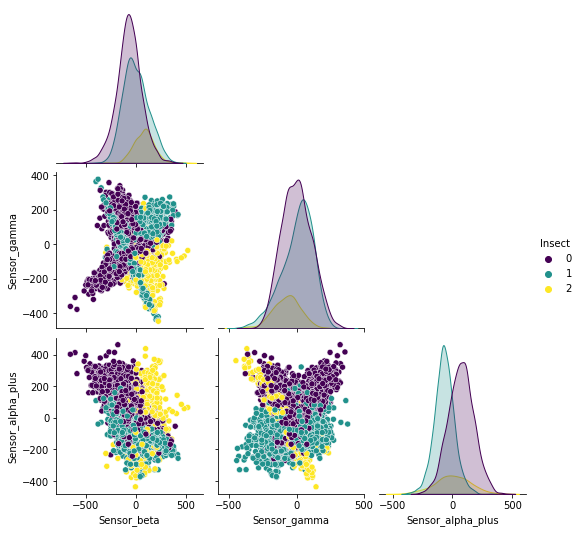

In [288]:
sns.pairplot(data = df_train,vars =['Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus'],hue='Insect',palette='viridis',corner=True);

Para entender algo mejor qué representan las sumas de los sensores, hacemos la siguiente gráfica

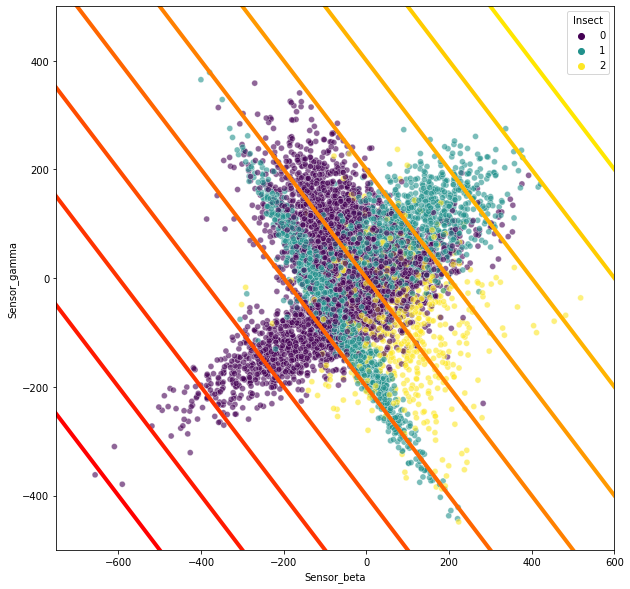

In [289]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= df_train['Sensor_beta'], y=df_train['Sensor_gamma'],hue=df_train['Insect'],palette='viridis',alpha=0.6)
plt.xlim(-750,600)
plt.ylim(-500,500)

x = np.linspace(-1200,1200,3)

import matplotlib

cmap = matplotlib.cm.get_cmap('autumn')

for i in range(-1000,1000,200):
    plt.plot(x, -x+i,color=cmap((i+1000)/2000),linewidth=4)

En ella representamos la distribución doble del Sensor gamma frente al Sensor beta con un scatterplot. Cada recta que aparece representa una región del diagrama con igual valor de (Sensor gamma + Sensor beta), y el valor concreto está representado por el color de la recta. Por ejemplo, la zona de la esquina inferior izquierda tiene los valores más bajos de (Sensor gamma + Sensor beta); y en esa zona se agrupa una gran cantidad de insectos tipo 0, por lo que es probable que el valor de (Sensor gamma + Sensor beta) sea útil para distinguir a ese tipo de insecto de los demás. También hay una franja en el centro del diagrama en la cual el insecto tipo 1 prácticamente sigue una de esas rectas, por lo que es posible que el modelo pueda distinguirlo.

Vamos a generar esas features y a evaluar el modelo.

In [290]:
feats_eng= df_train.drop(['Insect','Sensor_alpha','Sensor_beta_plus','Sensor_gamma_plus'],axis=1).copy()

n= len(feats_eng.columns)
        
    
## Sumas

for i in range(2,n):
    for j in range(i+1,n):
        feats_eng[feats_eng.iloc[:,i].name+ '+' + feats_eng.iloc[:,j].name] = feats_eng.iloc[:,i]+feats_eng.iloc[:,j]



In [291]:
X= feats_eng
y = df_train['Insect']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

rfc = RandomForestClassifier(n_estimators=100,random_state=101)
f1_score = cross_val_score(rfc, X_train, y_train, cv=RepeatedKFold(n_splits=5,n_repeats=10,random_state=5),scoring='f1_macro')

print('Mean f1-score Repeated {}-fold cross validation: {}'.format(f1_score.size,round(np.mean(f1_score),5)))

Mean f1-score Repeated 50-fold cross validation: 0.84618


Como podemos observar el resultado mejora ostensiblemente. Ante este descubrimiento, surge la posibilidad de utilizar otras curvas de nivel que capten las diferencias entre las clases. Podemos emplear las $restas$ de los sensores, que representarán curvas de nivel con pendiente positiva en las distribuciones dobles. Repetimos un gráfico similar al anterior para ilustrar este punto.

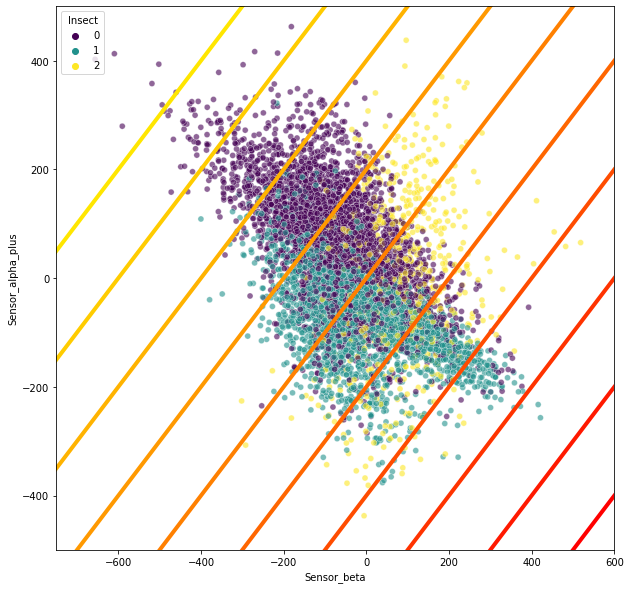

In [292]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= df_train['Sensor_beta'], y=df_train['Sensor_alpha_plus'],hue=df_train['Insect'],palette='viridis',alpha=0.6)
plt.xlim(-750,600)
plt.ylim(-500,500)

x = np.linspace(-1200,1200,3)

import matplotlib

cmap = matplotlib.cm.get_cmap('autumn')

for i in range(-1000,1000,200):
    plt.plot(x,x+i,color=cmap((i+1000)/2000),linewidth=4)

Las rectas son curvas de nivel de (Sensor alpha plus - Sensor beta). Los mayores valores ocurren en la esquina superior izquierda. De nuevo vemos que es una zona poblada distintivamente por insectos tipo 0.

Vamos a crear estas features y a evaluar el modelo.

In [293]:
feats_eng= df_train.drop(['Insect','Sensor_alpha','Sensor_beta_plus','Sensor_gamma_plus'],axis=1).copy()

n= len(feats_eng.columns)
        
    
## Sumas

for i in range(2,n):
    for j in range(i+1,n):
        feats_eng[feats_eng.iloc[:,i].name+ '+' + feats_eng.iloc[:,j].name] = feats_eng.iloc[:,i]+feats_eng.iloc[:,j]



## Restas

for i in range(2,n):
    for j in range(i+1,n):
        feats_eng[feats_eng.iloc[:,i].name+ '-' + feats_eng.iloc[:,j].name] = feats_eng.iloc[:,i]-feats_eng.iloc[:,j]

In [294]:
X= feats_eng
y = df_train['Insect']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

rfc = RandomForestClassifier(n_estimators=100,random_state=101)
f1_score = cross_val_score(rfc, X_train, y_train, cv=RepeatedKFold(n_splits=5,n_repeats=10,random_state=5),scoring='f1_macro')

print('Mean f1-score Repeated {}-fold cross validation: {}'.format(f1_score.size,round(np.mean(f1_score),5)))

Mean f1-score Repeated 50-fold cross validation: 0.85374


El resultado sigue mejorando.

Para ilustrar la importancia de las nuevas features vamos a representar sus distribuciones dobles, en las cuales apreciaremos de nuevo que hay regiones claramente distinguibles para cada insecto.

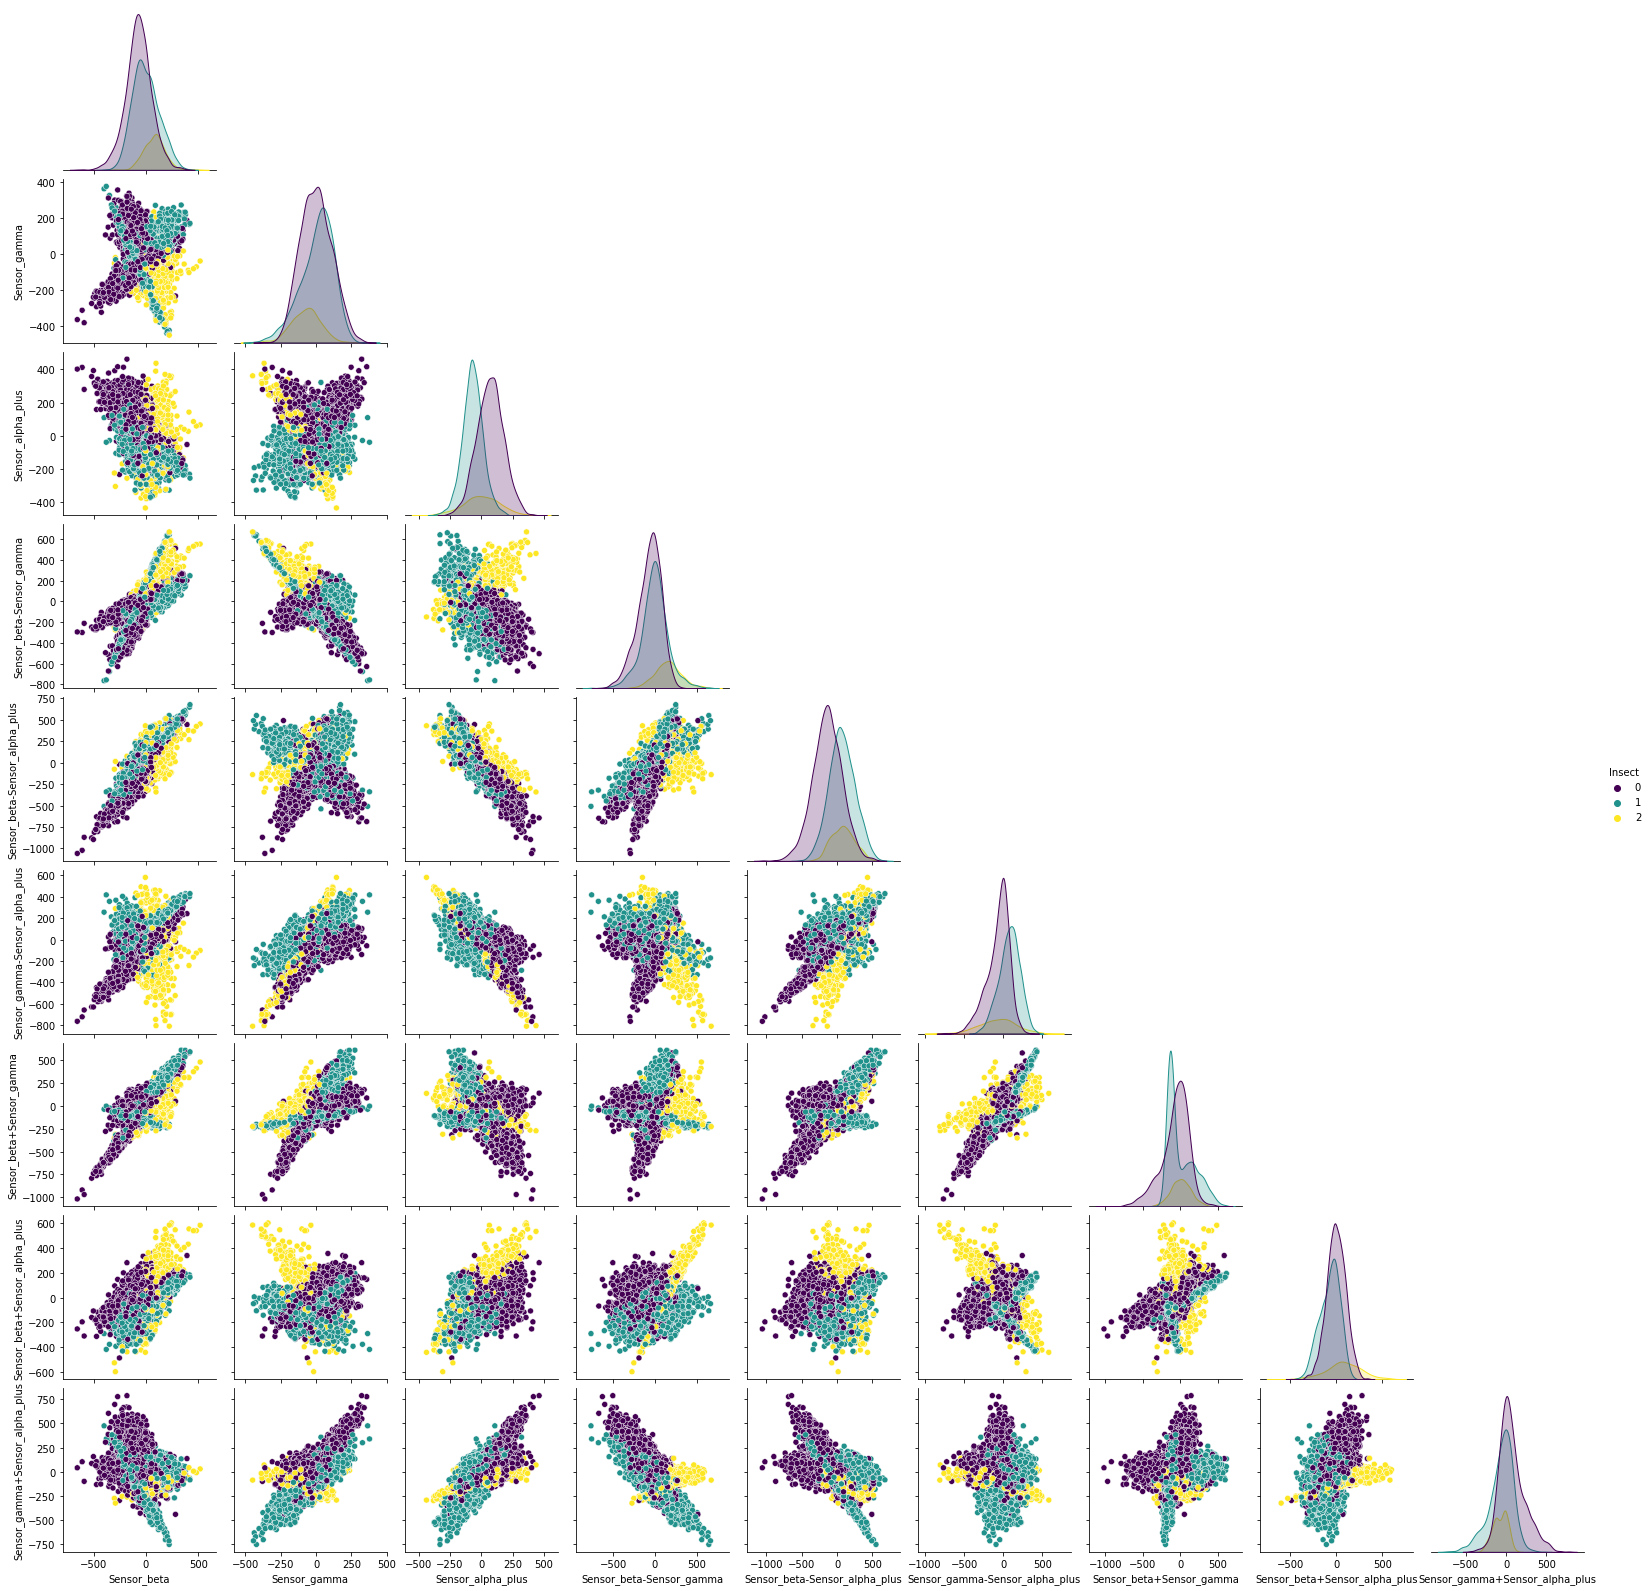

In [295]:
feats_eng['Insect'] = df_train['Insect']

sns.pairplot(data = feats_eng,vars =['Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus','Sensor_beta-Sensor_gamma', 'Sensor_beta-Sensor_alpha_plus',
       'Sensor_gamma-Sensor_alpha_plus', 'Sensor_beta+Sensor_gamma',
       'Sensor_beta+Sensor_alpha_plus', 'Sensor_gamma+Sensor_alpha_plus'],hue='Insect',palette='viridis',corner=True)

feats_eng.drop('Insect',axis=1,inplace=True)

¿Y si probásemos a abandonar la linealidad? Vamos a construir los cubos de los sensores (y no los cuadrados, ya que así se mantiene el signo de la cifra). Esto puede ayudar a generar curvas de nivel no lineales que proporcionen más versatilidad al modelo.

In [296]:
feats_eng= df_train.drop(['Insect','Sensor_alpha','Sensor_beta_plus','Sensor_gamma_plus'],axis=1).copy()

n= len(feats_eng.columns)
        
    
## Sumas

for i in range(2,n):
    for j in range(i+1,n):
        feats_eng[feats_eng.iloc[:,i].name+ '+' + feats_eng.iloc[:,j].name] = feats_eng.iloc[:,i]+feats_eng.iloc[:,j]



## Restas

for i in range(2,n):
    for j in range(i+1,n):
        feats_eng[feats_eng.iloc[:,i].name+ '-' + feats_eng.iloc[:,j].name] = feats_eng.iloc[:,i]-feats_eng.iloc[:,j]
        
        
## Cubos

for i in range(2,n):
        feats_eng[feats_eng.iloc[:,i].name+ ' cubed'] = feats_eng.iloc[:,i]**3

In [297]:
X= feats_eng
y = df_train['Insect']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

rfc = RandomForestClassifier(n_estimators=100,random_state=101)
f1_score = cross_val_score(rfc, X_train, y_train, cv=RepeatedKFold(n_splits=5,n_repeats=10,random_state=5),scoring='f1_macro')

print('Mean f1-score Repeated {}-fold cross validation: {}'.format(f1_score.size,round(np.mean(f1_score),5)))

Mean f1-score Repeated 50-fold cross validation: 0.85025


Vemos que estas features no mejoran el modelo. Por ello, vamos a descartarlas y a conservar las sumas y las restas.

In [298]:
feats_eng= df_train.drop(['Insect','Sensor_alpha','Sensor_beta_plus','Sensor_gamma_plus'],axis=1).copy()

n= len(feats_eng.columns)
        
    
## Sumas

for i in range(2,n):
    for j in range(i+1,n):
        feats_eng[feats_eng.iloc[:,i].name+ '+' + feats_eng.iloc[:,j].name] = feats_eng.iloc[:,i]+feats_eng.iloc[:,j]



## Restas

for i in range(2,n):
    for j in range(i+1,n):
        feats_eng[feats_eng.iloc[:,i].name+ '-' + feats_eng.iloc[:,j].name] = feats_eng.iloc[:,i]-feats_eng.iloc[:,j]

### PCA (Principal Component Analysis)

PCA es un procedimiento que proyecta sobre dimensiones inferiores un conjunto de datos, de manera que encuentra los hiperplanos con mayor variación en los datos y por tanto, en principio, mayor cantidad de información. Es una manera de reducir la dimensionalidad de los datos, minimizando la perdida de información.

En lugar de reducir la dimensionalidad de los datos vamos a realizar PCA sobre los datos de los sensores, ya que cualitativamente son distintos de la hora de la medición. No reduciremos la dimensionalidad, manteniendo el número de features actual de los sensores (9); así se crearan nuevas regiones en el espacio de features que quizá el Random Forest pueda distinguir mejor. Esta es una funcionalidad que de nuevo proporciona $\textit{scikit-learn}$.

In [299]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)

pca_feats = feats_eng.copy()


pca.fit(pca_feats.drop(['Hour','Minutes'],axis=1))


pca_feats[['Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus',
       'Sensor_beta-Sensor_gamma', 'Sensor_beta-Sensor_alpha_plus',
       'Sensor_gamma-Sensor_alpha_plus', 'Sensor_beta+Sensor_gamma',
       'Sensor_beta+Sensor_alpha_plus', 'Sensor_gamma+Sensor_alpha_plus']]= pca.transform(pca_feats[['Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus',
       'Sensor_beta-Sensor_gamma', 'Sensor_beta-Sensor_alpha_plus',
       'Sensor_gamma-Sensor_alpha_plus', 'Sensor_beta+Sensor_gamma',
       'Sensor_beta+Sensor_alpha_plus', 'Sensor_gamma+Sensor_alpha_plus']])

y = df_train['Insect']

X_train, X_test, y_train, y_test = train_test_split(pca_feats, y, test_size=0.3,random_state=101)

rfc = RandomForestClassifier(n_estimators=100,random_state=101)
f1_score = cross_val_score(rfc, X_train, y_train, cv=RepeatedKFold(n_splits=5,n_repeats=10,random_state=5),scoring='f1_macro')

print('Mean f1-score Repeated {}-fold cross validation: {}'.format(f1_score.size,round(np.mean(f1_score),5)))

Mean f1-score Repeated 50-fold cross validation: 0.8402


Como vemos, el rendimiento no mejora, por lo que descartamos esta técnica.

### One vs all

El Random Forest que hemos utilizado está entrenado para distinguir las tres clases, pero podríamos entrenar a tres modelos para distinguir a cada clase de las demás. Esta técnica se conoce como $\textit{One vs all}$. La predicción final del modelo se realizaría usando la confianza que cada uno de los tres tiene en su predicción individual. Con $\textit{scikit-learn}$ podemos implementar esta técnica y comprobar su desempeño.

In [300]:
from sklearn.multiclass import OneVsRestClassifier

X= feats_eng
y = df_train['Insect']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)


rforest = RandomForestClassifier(random_state=101)

one_vs_all = OneVsRestClassifier(rforest)
f1_score = cross_val_score(one_vs_all, X_train, y_train, cv=RepeatedKFold(n_splits=5,n_repeats=10,random_state=5),scoring='f1_macro')

print('Mean f1-score {}-fold cross validation: {}'.format(f1_score.size,round(np.mean(f1_score),5)))

Mean f1-score 50-fold cross validation: 0.85883


Recordemos que el anterior mejor resultado es $0.85374$. Por tanto, conservaremos esta técnica. Como hemos visto en las distribuciones dobles, algunas clases son más fáciles de distinguir frente al resto que distinguirlas globalmente, lo que puede explicar esta mejora del rendimiento.

Como hemos visto en las representaciones gráficas, los insectos se distribuyen en regiones complejas. Esto puede explicar la superioridad del Random Forest; su algoritmo divide en secciones rectangulares óptimas el espacio de las features.

## Otros modelos

Hasta ahora hemos utilizado un único modelo de clasificación, el Random Forest. Pero sería sabio comprobar el rendimiento de otros algoritmos de clasificación. En esta sección haremos brevemente esa tarea, y comprobaremos como el Random Forest es el que ofrece mejores resultados.

### K Nearest Neighbours

Este algoritmo clasifica las instancias según su cercanía en el espacio de las features a las instancias del dataset. Al recibir una nueva instancia el algoritmo encuentra las k instancias más cercanas a la nueva instancia en el set de entrenamiento , y la clasifica según la clase mayoritaria en estos k vecinos. La cercanía puede definirse con distintas métricas de la distancia, por ejemplo, la distancia euclídea en el espacio f-dimensional de las features, si f es el número de features.

Procedamos a entrenar este modelo y observemos sus resultados.

In [301]:
from sklearn.neighbors import KNeighborsClassifier

rforest = RandomForestClassifier(random_state=101)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

f1_score = cross_val_score(knn, X_train, y_train, cv=RepeatedKFold(n_splits=5,n_repeats=10,random_state=5),scoring='f1_macro')

print('Mean f1-score {}-fold cross validation: {}'.format(f1_score.size,round(np.mean(f1_score),5)))

Mean f1-score 50-fold cross validation: 0.80207


### Logistic Regression

La regresión logística es capaz de realizar clasificación binaria. Para ello, ajusta los parámetros de un hiperplano e introduce el valor cada instancia en la llamada función sigmoide, que ofrece un resultado entre 0 y 1. Este valor puede interpretarse como la probabilidad de que la instancia pertenezca a la clase positiva.

En nuestros caso tenemos tres clases, pero podemos utilizar la técnica de $\textit{one vs all}$ para adaptarlo a este problema.

In [302]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

one_vs_all_log = OneVsRestClassifier(log)
f1_score = cross_val_score(one_vs_all_log, X_train, y_train, cv=RepeatedKFold(n_splits=5,n_repeats=10,random_state=5),scoring='f1_macro')

print('Mean f1-score {}-fold cross validation: {}'.format(f1_score.size,round(np.mean(f1_score),5)))

Mean f1-score 50-fold cross validation: 0.56382


Para este algoritmo las clases desbalanceadas suponen una gran complicación, pues el método de aprendizaje no está diseñado para optimizar el f1-score. Para ilustrarlo vamos a imprimir la matriz de confusión y el reporte de métricas evaluando el modelo en el test de evaluación.



In [303]:
one_vs_all_log.fit(X_train,y_train)

log_pred = one_vs_all_log.predict(X_test)

print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred,digits=3))

[[852 176   1]
 [196 646  15]
 [112  70  33]]


              precision    recall  f1-score   support

           0      0.734     0.828     0.778      1029
           1      0.724     0.754     0.739       857
           2      0.673     0.153     0.250       215

    accuracy                          0.729      2101
   macro avg      0.711     0.578     0.589      2101
weighted avg      0.724     0.729     0.708      2101



Como vemos, la accuracy total es mucho mejor que el f1-score. Mientras que los modelos para las clases 0 y 1 funcionan bien, la baja cantidad de instancias de la clase 2 empeora gravemente el modelo.

Esto podría mejorarse haciendo $\textit{undersampling}$, es decir, seleccionando una muestra menor de las clases sobrerrepresentadas, de manera que la cantidad de instancias de las tres se asemeje. O haciendo $\textit{oversampling}$, generando copias de la clase infrarrepresentada. Sin embargo, al no ver resultados prometedores globalmente de la regresión logística, nos abstendremos de explorar ese camino.

### Red neuronal feedforward


Una red neuronal es un conjunto de neuronas, que funcionan como una cierta función matemática, dispuestas en capas interconectadas cuya respuesta está determinada por una serie de parámetros. Estos parámetros, a menudo llamados $\textit{pesos}$, pueden optimizarse para que la respuesta de la red sea predictiva respecto a unos ciertos datos. El entrenamiento puede realizarse con algoritmos como $\textit{gradient descent}$ y $\textit{backpropagation}$. 

Las redes neuronales aprenden del set de entrenamiento, optimizando poco a poco sus parámetros. Es una técnica muy poderosa, pues jugar con el número de neuronas y las capas otorga mucha flexibilidad al modelo, aunque debe velarse por no incurrir en $\textit{overfitting}$.

Ajustaremos la red neuronal con todo el set de entrenamiento y evaluaremos con el set de evaluación.

Para implementar este modelo utilizaremos una nueva librería, $\textit{tensorflow}$

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [141]:
model = Sequential([
    Dense(11,activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')])


model.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), epochs=300, verbose=1)

Epoch 1/300
154/154 [==============================] - 1s 4ms/step - loss: 2.3562 - accuracy: 0.6755 - val_loss: 0.6190 - val_accuracy: 0.7739
Epoch 2/300
154/154 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.7515 - val_loss: 0.7776 - val_accuracy: 0.7059
Epoch 3/300
154/154 [==============================] - 0s 961us/step - loss: 0.6959 - accuracy: 0.7471 - val_loss: 0.5956 - val_accuracy: 0.7734
Epoch 4/300
154/154 [==============================] - 0s 961us/step - loss: 0.5600 - accuracy: 0.7696 - val_loss: 0.5432 - val_accuracy: 0.8039
Epoch 5/300
154/154 [==============================] - 0s 981us/step - loss: 0.5587 - accuracy: 0.7771 - val_loss: 0.5289 - val_accuracy: 0.7915
Epoch 6/300
154/154 [==============================] - 0s 948us/step - loss: 0.5463 - accuracy: 0.7725 - val_loss: 0.5376 - val_accuracy: 0.7920
Epoch 7/300
154/154 [==============================] - 0s 987us/step - loss: 0.5236 - accuracy: 0.7874 - val_loss: 0.5404 - val_accura

154/154 [==============================] - 0s 974us/step - loss: 0.3502 - accuracy: 0.8499 - val_loss: 0.4090 - val_accuracy: 0.8191
Epoch 58/300
154/154 [==============================] - 0s 935us/step - loss: 0.3723 - accuracy: 0.8341 - val_loss: 0.3850 - val_accuracy: 0.8515
Epoch 59/300
154/154 [==============================] - 0s 948us/step - loss: 0.3439 - accuracy: 0.8543 - val_loss: 0.3638 - val_accuracy: 0.8553
Epoch 60/300
154/154 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8620 - val_loss: 0.4112 - val_accuracy: 0.8239
Epoch 61/300
154/154 [==============================] - 0s 989us/step - loss: 0.3502 - accuracy: 0.8546 - val_loss: 0.3712 - val_accuracy: 0.8448
Epoch 62/300
154/154 [==============================] - 0s 994us/step - loss: 0.3420 - accuracy: 0.8569 - val_loss: 0.3817 - val_accuracy: 0.8486
Epoch 63/300
154/154 [==============================] - 0s 994us/step - loss: 0.3310 - accuracy: 0.8644 - val_loss: 0.3747 - val_accuracy: 

154/154 [==============================] - 0s 954us/step - loss: 0.2899 - accuracy: 0.8805 - val_loss: 0.3778 - val_accuracy: 0.8496
Epoch 114/300
154/154 [==============================] - 0s 981us/step - loss: 0.2893 - accuracy: 0.8783 - val_loss: 0.3583 - val_accuracy: 0.8520
Epoch 115/300
154/154 [==============================] - 0s 974us/step - loss: 0.2806 - accuracy: 0.8837 - val_loss: 0.3811 - val_accuracy: 0.8520
Epoch 116/300
154/154 [==============================] - 0s 974us/step - loss: 0.2800 - accuracy: 0.8836 - val_loss: 0.3742 - val_accuracy: 0.8491
Epoch 117/300
154/154 [==============================] - 0s 961us/step - loss: 0.2809 - accuracy: 0.8813 - val_loss: 0.3774 - val_accuracy: 0.8529
Epoch 118/300
154/154 [==============================] - 0s 974us/step - loss: 0.2874 - accuracy: 0.8728 - val_loss: 0.3803 - val_accuracy: 0.8496
Epoch 119/300
154/154 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8834 - val_loss: 0.3859 - val_accu

154/154 [==============================] - 0s 974us/step - loss: 0.2315 - accuracy: 0.9029 - val_loss: 0.3851 - val_accuracy: 0.8467
Epoch 170/300
154/154 [==============================] - 0s 998us/step - loss: 0.2513 - accuracy: 0.8955 - val_loss: 0.3991 - val_accuracy: 0.8482
Epoch 171/300
154/154 [==============================] - 0s 988us/step - loss: 0.2482 - accuracy: 0.9006 - val_loss: 0.4082 - val_accuracy: 0.8539
Epoch 172/300
154/154 [==============================] - 0s 974us/step - loss: 0.2331 - accuracy: 0.9060 - val_loss: 0.4066 - val_accuracy: 0.8396
Epoch 173/300
154/154 [==============================] - 0s 954us/step - loss: 0.2438 - accuracy: 0.8980 - val_loss: 0.3994 - val_accuracy: 0.8467
Epoch 174/300
154/154 [==============================] - 0s 963us/step - loss: 0.2374 - accuracy: 0.8962 - val_loss: 0.4167 - val_accuracy: 0.8486
Epoch 175/300
154/154 [==============================] - 0s 1ms/step - loss: 0.2428 - accuracy: 0.8961 - val_loss: 0.4310 - val_accu

Epoch 225/300
154/154 [==============================] - 0s 952us/step - loss: 0.2369 - accuracy: 0.9084 - val_loss: 0.4424 - val_accuracy: 0.8439
Epoch 226/300
154/154 [==============================] - 0s 984us/step - loss: 0.2216 - accuracy: 0.9033 - val_loss: 0.4834 - val_accuracy: 0.8144
Epoch 227/300
154/154 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.9060 - val_loss: 0.4517 - val_accuracy: 0.8401
Epoch 228/300
154/154 [==============================] - 0s 1ms/step - loss: 0.2327 - accuracy: 0.8999 - val_loss: 0.4536 - val_accuracy: 0.8401
Epoch 229/300
154/154 [==============================] - 0s 974us/step - loss: 0.2254 - accuracy: 0.9020 - val_loss: 0.4444 - val_accuracy: 0.8382
Epoch 230/300
154/154 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.8971 - val_loss: 0.4552 - val_accuracy: 0.8525
Epoch 231/300
154/154 [==============================] - 0s 961us/step - loss: 0.2250 - accuracy: 0.9004 - val_loss: 0.4258 

Epoch 281/300
154/154 [==============================] - 0s 994us/step - loss: 0.1972 - accuracy: 0.9164 - val_loss: 0.4685 - val_accuracy: 0.8325
Epoch 282/300
154/154 [==============================] - 0s 954us/step - loss: 0.2060 - accuracy: 0.9162 - val_loss: 0.4831 - val_accuracy: 0.8382
Epoch 283/300
154/154 [==============================] - 0s 961us/step - loss: 0.1990 - accuracy: 0.9193 - val_loss: 0.4785 - val_accuracy: 0.8510
Epoch 284/300
154/154 [==============================] - 0s 961us/step - loss: 0.2044 - accuracy: 0.9126 - val_loss: 0.5090 - val_accuracy: 0.8439
Epoch 285/300
154/154 [==============================] - 0s 980us/step - loss: 0.2198 - accuracy: 0.9051 - val_loss: 0.5046 - val_accuracy: 0.8386
Epoch 286/300
154/154 [==============================] - 0s 968us/step - loss: 0.1973 - accuracy: 0.9189 - val_loss: 0.5045 - val_accuracy: 0.8358
Epoch 287/300
154/154 [==============================] - 0s 961us/step - loss: 0.1775 - accuracy: 0.9252 - val_loss: 0

In [146]:
neu_pred = np.argmax(model.predict(X_test), axis=-1)

print(confusion_matrix(y_test,neu_pred))
print('\n')
print(classification_report(y_test,neu_pred,digits=3))

[[885  96  48]
 [130 718   9]
 [ 60  16 139]]


              precision    recall  f1-score   support

           0      0.823     0.860     0.841      1029
           1      0.865     0.838     0.851       857
           2      0.709     0.647     0.676       215

    accuracy                          0.829      2101
   macro avg      0.799     0.781     0.790      2101
weighted avg      0.829     0.829     0.828      2101



Los resultados de la red neuronal son buenos, aunque siguen siendo inferiores a los del one-vs-all Random Forest. Por lo que nos quedaremos con este último para hacer las predicciones finales.

### Hiperparámetros de un Random Forest

Los algoritmos en ciencia de datos suelen estar regulados por parámetros que no son susceptibles de ser optimizados directamente a partir de los datos. A estos se les suele llamar hiperparámetros.

Para encontrar estos valores óptimos se debe probar el rendimiento del algoritmo cambiando los valores de estos parámetros y comparando el desempeño. No existe, en general, un algoritmo directo para optimizarlos, salvo probar cada valor por separado y observar los resultados.

Pero sí existen algunas técnicas que facilitan este proceso. Una de ellas es la ya utilizada $\textit{cross validation}$. A la hora de probar diferentes hiperparámetros los resultados se evalúan en el test set. Pero al hacerlo se corre el riesgo de estar optimizando esos parámetros $\textit{para}$ ese test set en concreto, empobreciendo el funcionamiento futuro del modelo. Por ello se utiliza esta técnica.

Con este procedimiento se evita sesgar los hiperparámetros a un conjunto de datos concreto.

Para cada valor del hiperparámetro realizaremos el proceso de cross validation varias veces y promediaremos los resultados, controlando así la aleatoriedad intrínseca del Random Forest

### Hiperparámetros de un Random Forest

#### n_estimators

El primer parámetro que puede considerarse es el número de árboles de decisión que conforman el forest. En principio el rendimiento tiende a mejorar indefinidamente según aumenta este número, pero llega un punto en que el crecimiento se hace extremadamente lento o prácticamente se estabiliza. Por ello, y teniendo en cuanta que según aumenta este número también lo hace el coste computacional, es deseable encontar este punto de estabilización y no excederlo.

Realizamos ahora el procedimiento de cross validation, dividiendo el training set en 6 partes, y probando desde $n=100$ hasta $n=300$ para el número de árboles. Generamos una gráfica que representa el f1-score macro para cada valor. El tiempo de ejecución de la celda puede ser considerable, por lo que se va imprimiendo por pantalla el progreso.

In [183]:
mean_scores_nestimators=[]

steps= 300

for i in range(100,steps+1,20):
    int_list= []
    for j in range(5):
        rfc = RandomForestClassifier(n_estimators=i)
        one_vs_all = OneVsRestClassifier(rfc)
        int_list.append(np.mean(cross_val_score(one_vs_all, X_train, y_train, cv=6,scoring='f1_macro')))
        
    mean_scores_nestimators.append(np.mean(int_list))
    print('Va por el forest de ', str(i), ' árboles')

Va por el forest de  100  árboles
Va por el forest de  120  árboles
Va por el forest de  140  árboles
Va por el forest de  160  árboles
Va por el forest de  180  árboles
Va por el forest de  200  árboles
Va por el forest de  220  árboles
Va por el forest de  240  árboles
Va por el forest de  260  árboles
Va por el forest de  280  árboles
Va por el forest de  300  árboles


Text(0, 0.5, 'Mean f1 Score')

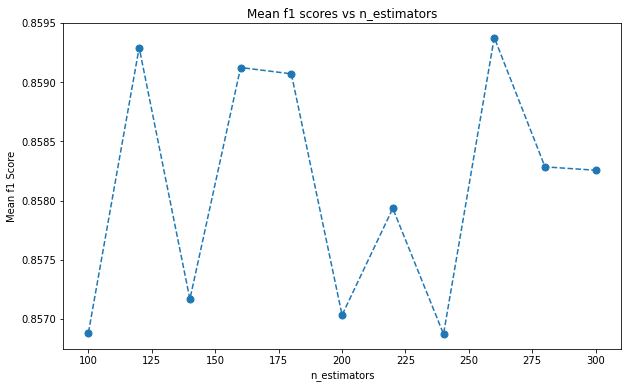

In [184]:
plt.figure(figsize=(10,6))
plt.plot(range(100,steps+1,20),list(map(np.mean,mean_scores_nestimators)),linestyle='dashed',marker='o',markersize=7)
plt.title('Mean f1 scores vs n_estimators')
plt.xlabel('n_estimators') ; plt.ylabel('Mean f1 Score')

No parece haber una tendencia clara de mejora con el número de estimadores. Por tanto, mantendremos el parámetro en 100, que es el número por defecto. 

#### Cost complexity pruning,  parámetro $\alpha$ 

Una de las técnicas que pueden aplicarse a los Random Forest es una llamada $\textit{cost complexity pruning}$. Consiste en "podar" los nodos terminales de los de los árboles, deshaciendo en cierta medida la construcción del árbol. Esta técnica ayuda a combatir el $\textit{overfitting}$, pues el árbol puede sobreajustar los datos de entrenamiento de manera que generalice pobremente a los datos del test set. Esto se logra imponiendo un coste al número de nodos total del árbol, contando también los nodos internos, ya que a mayor número de nodos mayor riesgo de overfitting.

Este coste está regulado por el parámetro $\alpha$. Haciendo pruebas preliminares hemos comprobado que valores altos de $\alpha$ generan malos resultados, por lo que comenzamos con valores de diezmilésimas el proceso de cross validation.

In [179]:
mean_scores_alpha=[]

steps= 10

for i in range(steps):
    int_list =[]
    for j in range(10):
        rfc = RandomForestClassifier(n_estimators=50,ccp_alpha=0.0 +i*5e-5)
        one_vs_all = OneVsRestClassifier(rfc)
        int_list.append(np.mean(cross_val_score(one_vs_all, X_train, y_train, cv=5,scoring='f1_macro')))
    
    mean_scores_alpha.append(np.mean(int_list))
    print('va por el paso', i,'/',steps)

va por el paso 0 / 10
va por el paso 1 / 10
va por el paso 2 / 10
va por el paso 3 / 10
va por el paso 4 / 10
va por el paso 5 / 10
va por el paso 6 / 10
va por el paso 7 / 10
va por el paso 8 / 10
va por el paso 9 / 10


Text(0, 0.5, 'Mean Score')

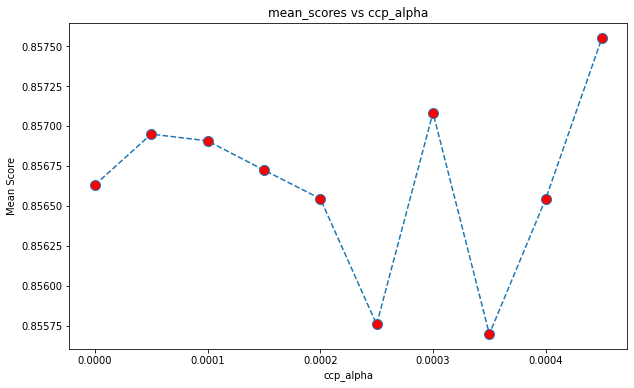

In [180]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0.0000,5e-5*(steps-1),steps),list(map(np.mean,mean_scores_alpha)),linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('mean_scores vs ccp_alpha')
plt.xlabel('ccp_alpha') ; plt.ylabel('Mean Score')

No se aprecia una tendencia clara en este parámetro, por lo que se mantendrá a cero.

#### max_features

La cualidad distintiva de un Random Forest que diferencia a los árboles que lo integran es que en cada paso para la creación de nodos internos no consideran todas las features y seleccionan la segmentación óptima (que viene definida por su reducción de alguna métrica como el coeficiente Gini), sino que sólo consideran una fracción del total elegida aleatoriamente. El árbol de decisión se construye por un algoritmo $\textit{greedy}$, es decir, no busca la solución globalmente óptima, lo que sería demasiado costoso computacionalmente, si no que a cada paso construye la mejor solución disponible. Recordemos que un árbol de decisión trata de optimizar la pureza de sus nodos terminales. 

Mediante esta selección aleatoria de features a cada paso, es probable que alguno de los árboles encuentre, en diferentes partes de su construcción, el paso globalmente óptimo. Al promediar todos los árboles se logra una medida más exacta. También puede pensarse que este proceso hace que los árboles estén menos correlacionados; al promediarlos se logra una disminución en la varianza mayor que en el caso de que estuviesen correlacionados, lo cual ocurriría con toda seguridad ya que todos se construyen de manera $\textit{greedy}$.

Por ello, el número de features a considerar en cada paso puede variar entre 1 y el número total de features.

va por el paso  1 / 11
va por el paso  2 / 11
va por el paso  3 / 11
va por el paso  4 / 11
va por el paso  5 / 11
va por el paso  6 / 11
va por el paso  7 / 11
va por el paso  8 / 11
va por el paso  9 / 11
va por el paso  10 / 11
va por el paso  11 / 11


Text(0, 0.5, 'Mean f1 Score')

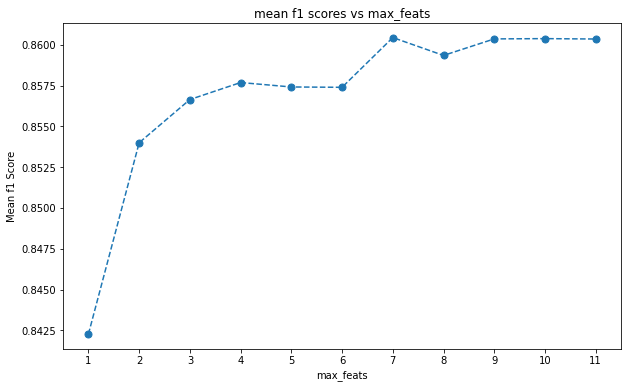

In [185]:
mean_scores_nfeats=[]

feats=11

for i in range(1,feats+1):
    print('va por el paso ', i,'/',feats)
    internal_list= []
    for j in range(5):
        rfc = RandomForestClassifier(n_estimators=50,max_features=i,)
        one_vs_all = OneVsRestClassifier(rfc)
        internal_list.append(np.mean(cross_val_score(one_vs_all, X_train, y_train, cv=6,scoring='f1_macro')))
    
    mean_scores_nfeats.append(np.mean(internal_list))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,feats+1),mean_scores_nfeats,linestyle='dashed',marker='o',markersize=7)
plt.xticks(range(1,feats+1))
plt.title('mean f1 scores vs max_feats')
plt.xlabel('max_feats') ; plt.ylabel('Mean f1 Score')    

El criterio habitual para selecccionar $\textit{max_features}$ es tomar la raiz cuadrada del número de features. Bajo ese criterio $\textit{max_features}$ podría ser 3 ó 4. Pero vemos que el valor óptimo resulta ser 7. Tomaremos pues este valor para el modelo final.

Con los hiperparámetros encontrados vamos a hacer una última evaluación de nuestro modelo.

In [304]:
from sklearn.multiclass import OneVsRestClassifier

X= feats_eng
y = df_train['Insect']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)


rforest = RandomForestClassifier(random_state=101,max_features=7)

one_vs_all = OneVsRestClassifier(rforest)
f1_score = cross_val_score(one_vs_all, X_train, y_train, cv=RepeatedKFold(n_splits=5,n_repeats=10,random_state=5),scoring='f1_macro')

print('Mean f1-score {}-fold cross validation: {}'.format(f1_score.size,round(np.mean(f1_score),5)))

Mean f1-score 50-fold cross validation: 0.86008


El rendimiento ha mejorado ligeramente.

## Modelo final

Ahora entrenamos al modelo en todo el dataset y realizamos las predicciones finales con los datos de $\textit{test_x.csv}$.

Las predicciones finales son el resultado del voto mayoritario de 100 One-vs-All Random Forests para cada instancia, todos ellos optimizados con los hiperparámetros encontrados. De esta manera se atenúa el efecto de la aleatoriedad intrínseca en el algoritmo.

En el archivo csv generado una de las columnas recoge el índice numérico tal y como aparece en el archivo $\textit{test_x.csv}$.

In [241]:
feats_test= df_test.drop(['Sensor_alpha','Sensor_beta_plus','Sensor_gamma_plus'],axis=1).copy()

n= len(feats_test.columns)
        
    
## Sumas

for i in range(2,n):
    for j in range(i+1,n):
        feats_test[feats_test.iloc[:,i].name+ '+' + feats_test.iloc[:,j].name] = feats_test.iloc[:,i]+feats_test.iloc[:,j]



## Restas

for i in range(2,n):
    for j in range(i+1,n):
        feats_test[feats_test.iloc[:,i].name+ '-' + feats_test.iloc[:,j].name] = feats_test.iloc[:,i]-feats_test.iloc[:,j]
        
        


In [246]:
df_train = pd.read_csv('train.csv',index_col=0)

feats_eng= df_train.drop(['Insect','Sensor_alpha','Sensor_beta_plus','Sensor_gamma_plus'],axis=1).copy()

n= len(feats_eng.columns)
        
    
## Sumas

for i in range(2,n):
    for j in range(i+1,n):
        feats_eng[feats_eng.iloc[:,i].name+ '+' + feats_eng.iloc[:,j].name] = feats_eng.iloc[:,i]+feats_eng.iloc[:,j]



## Restas

for i in range(2,n):
    for j in range(i+1,n):
        feats_eng[feats_eng.iloc[:,i].name+ '-' + feats_eng.iloc[:,j].name] = feats_eng.iloc[:,i]-feats_eng.iloc[:,j]

feats_eng.drop(7000,axis=0,inplace=True)
df_train.drop(7000,axis=0,inplace=True)


predictions= pd.DataFrame()

for i in range(100):
    print('Va por el paso ',i,'/',100)
    rfc_final = RandomForestClassifier(n_estimators=100,max_features=7)
    one_vs_all = OneVsRestClassifier(rfc_final)
    one_vs_all.fit(feats_eng,df_train['Insect'])
    predictions['pred'+str(i)] = one_vs_all.predict(feats_test)
    

Va por el paso  0 / 100
Va por el paso  1 / 100
Va por el paso  2 / 100
Va por el paso  3 / 100
Va por el paso  4 / 100
Va por el paso  5 / 100
Va por el paso  6 / 100
Va por el paso  7 / 100
Va por el paso  8 / 100
Va por el paso  9 / 100
Va por el paso  10 / 100
Va por el paso  11 / 100
Va por el paso  12 / 100
Va por el paso  13 / 100
Va por el paso  14 / 100
Va por el paso  15 / 100
Va por el paso  16 / 100
Va por el paso  17 / 100
Va por el paso  18 / 100
Va por el paso  19 / 100
Va por el paso  20 / 100
Va por el paso  21 / 100
Va por el paso  22 / 100
Va por el paso  23 / 100
Va por el paso  24 / 100
Va por el paso  25 / 100
Va por el paso  26 / 100
Va por el paso  27 / 100
Va por el paso  28 / 100
Va por el paso  29 / 100
Va por el paso  30 / 100
Va por el paso  31 / 100
Va por el paso  32 / 100
Va por el paso  33 / 100
Va por el paso  34 / 100
Va por el paso  35 / 100
Va por el paso  36 / 100
Va por el paso  37 / 100
Va por el paso  38 / 100
Va por el paso  39 / 100
Va por el 

In [260]:
results = []

for i in range(len(predictions)):
    results.append(predictions.iloc[i].value_counts().index[0])
    
final_results = pd.DataFrame(results,columns=['prediction'],index=df_test.index)

final_results

prediction
7000           1
7001           1
7002           0
7003           2
7004           0
...          ...
9995           1
9996           0
9997           1
9998           0
9999           2

[3000 rows x 1 columns]

In [261]:
final_results.to_csv('predictions.csv',index_label='Index')

In [262]:
pd.read_csv('predictions.csv',index_col=0)

prediction
Index            
7000            1
7001            1
7002            0
7003            2
7004            0
...           ...
9995            1
9996            0
9997            1
9998            0
9999            2

[3000 rows x 1 columns]